# CAP 5610 - Machine Learning 
# K-Means Clustering Algorithm Implementation & Analysis
## Robson Adem

In [405]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
from math import*
from scipy.spatial import distance

In [432]:
# ========== K-Means Implementation with desired distance measurements ==========
# Distance Measures
def dist(a, b, type = 'euclidean'):
    ret = []
    for i in range(len(b)):
        if type == 'cosine':
            ret.append(distance.cosine(a,b[i]))
        if type == 'jaccard':
            a_temp = np.array(a)
            b_temp = np.array(b[i])
            ret.append(distance.jaccard(a_temp.astype(int),b_temp.astype(int)))
        if type == 'euclidean':
            ret.append(distance.euclidean(a,b[i]))
        if type == 'manhattan':  
            ret.append(distance.cityblock(a,b[i]))
        if type == 'mahalanobis':  
            ret.append(distance.mahalanobis(a,b[i]))
        if type == 'correlation':  
            ret.append(distance.correlation(a,b[i]))
        if type == 'hamming':  
            ret.append(distance.hamming(a,b[i]))
        #print(ret)
    return ret

# comparing centroids a and b
def dist_means(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)
# randomly find centroids
def random_centroids(f1,f2,k):
    # X coordinates of random centroids
    C_x = np.random.uniform(np.min(f1), np.max(f1), size=k)
    # Y coordinates of random centroids
    C_y = np.random.uniform(np.min(f2), np.max(f2), size=k)
    C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
    return C
# Assigning each value to its closest cluster
def assign_cluster (X,C,distance_type):
    # Cluster Lables(0, 1, 2)
    clusters = np.zeros(len(X))
    for i in range(len(X)):
        distances = dist(X[i], C, distance_type)
        cluster = np.argmin(distances)
        clusters[i] = cluster
        # print(f"Cluster placement:{X[i]},{cluster}")
    return clusters
# calculate the SSE
def calculate_SSE(points, C):
    SSE = 0
    for dp in range(len(points)):
        SSE += (np.linalg.norm(C - dp, axis=0))**2
    return SSE

# k-means
def k_means(f1,f2,cluster_x, cluster_y,k=2,random = False, distance_type ='euclidean'):  
    # Number of clusters k 

    # ========== Step 1 - Pick K random points as cluster centers called centroids.==========
    X = np.array(list(zip(f1, f2))) # data vector
    if random:
        C = random_centroids(f1,f2,k)
    else: 
        C_x = cluster_x
        C_y = cluster_y
        C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
    # ========== Step 2 - Assign each X to nearest cluster by calculating its distance to each centroid.==========

    # To store the value of centroids when it updates
    C_prev = np.zeros(C.shape)
    # Error func. - Distance between new centroids and prev centroids
    error = dist_means(C, C_prev, None)

    # Initializing variables
    num_iterations = 0
    SSE_current = 0
    SSE_prev = 0 
    num_labels_assigned = 0
    # Terminating Conditions  
#     while error.any() != 0: # when there is no change in centroid position
    while num_iterations < 100: # when the maximum preset value (100) of iteration is complete 
#     while SSE_current <= SSE_prev: # when the SSE value increases in the next iteration
        
        # Making sure each cluster has gotten its respective data set 
        while (num_labels_assigned < k):
            clusters = assign_cluster (X,C,distance_type) # Assigning each value to its closest cluster
            num_labels_assigned = len(np.unique(clusters, return_counts=False))
        #print(num_labels_assigned)
        
        # Storing the prev centroid values
        C_prev = deepcopy(C)
        SSE_prev = SSE_current
        #print(f"The centroids prev were:{C_prev}")
        
       # ========== Step 3 - Find new cluster center by taking the average of the assigned points. ==========
        for i in range(k):
            points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
            C[i] = np.mean(points, axis=0)
            SSE_current+= calculate_SSE(points,C[i])
        #print(f"The centroids are:{C}")
        error = dist_means(C, C_prev, None)
        num_iterations+= 1
        
    print(f"The number of iterations are:{num_iterations}")
    print(f"The centroids are:{C}")
    
    # SSE for all points and their respective centers
    SSE = 0
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        SSE+= calculate_SSE(points,C[i])
    print(f"The SSE is :{SSE}")
    # ========== Step 4 - Plotting the Clusters. ==========   
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    fig, ax = plt.subplots()
    accuracy = 0
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        # Plot all the points and color them with their respective cluster color
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    # Mark the Centroids of each cluster with a black star
    
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
    fig.suptitle('Clustering using K-Means ', fontsize=12)
    return clusters
   


## 1. Testing K-Means on a sample dataset
Suppose we have 10 college football teams X1 to X10. We want to cluster them into 2 groups. For each football team, we have two features: One is # wins in Season 2016, and the other is # wins in Season 2017.

#### (1) Initialize with two centroids, (4, 6) and (5, 4). Use Manhattan distance as the distance metric. Please use K-Means to find two clusters.

  Unnamed: 0  # wins in Season 2016 (x-axis)   # wins in Season 2017 (y-axis) 
0         X1                                3                                5
1         X2                                3                                4
2         X3                                2                                8
3         X4                                2                                3
4         X5                                6                                2
5         X6                                6                                4
6         X7                                7                                3
7         X8                                7                                4
8         X9                                8                                5
9        X10                                7                                6
The number of iterations are:2
The centroids are:[[2.5       5.       ]
 [6.8333335 4.       ]]
The SSE is :448.33334790828417


array([0., 0., 0., 0., 1., 1., 1., 1., 1., 1.])

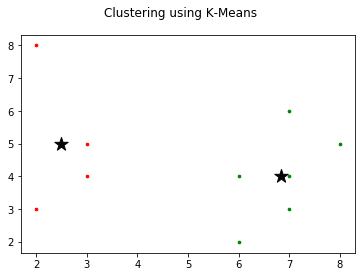

In [91]:
df = pd.read_csv('hw6data.csv')
print(df)
f1 = df.iloc[:,1]
f2 = df.iloc[:,2] 
C_x= [4,6]
C_y= [5,4]
k_means(f1,f2,C_x,C_y,k=2,random = False, distance_type ='manhattan')

#### (2) Initialize with two centroids, (4, 6) and (5, 4). Use Euclidean distance as the distance metric. Please use K-Means to find two clusters.

The number of iterations are:2
The centroids are:[[2.5       5.       ]
 [6.8333335 4.       ]]
The SSE is :448.33334790828417


array([0., 0., 0., 0., 1., 1., 1., 1., 1., 1.])

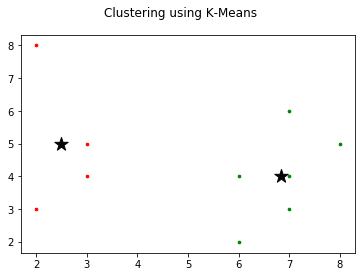

In [92]:
df = pd.read_csv('hw6data.csv')
f1 = df.iloc[:,1]
f2 = df.iloc[:,2] 
C_x= [4,6]
C_y= [5,4]
k_means(f1,f2,C_x,C_y,k=2,random = False, distance_type ='euclidean')

#### (3) Initialize with two centroids, (3, 3) and (8, 3). Use Manhattan distance as the distance metric. Please use K-Means to find two clusters.

The number of iterations are:3
The centroids are:[[4.        6.3333335]
 [5.571429  3.5714285]]
The SSE is :441.80955396028423


array([0., 1., 0., 1., 1., 1., 1., 1., 1., 0.])

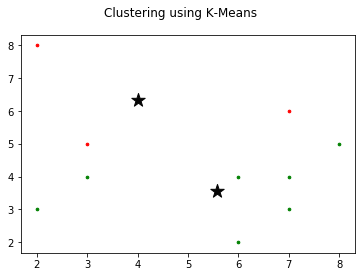

In [93]:
df = pd.read_csv('hw6data.csv')
f1 = df.iloc[:,1]
f2 = df.iloc[:,2] 
C_x= [3,3]
C_y= [8,3]
k_means(f1,f2,C_x,C_y,k=2,random = False, distance_type ='manhattan')


#### (4) Initialize with two centroids, (3, 2) and (4, 8). Use Manhattan distance as the distance metric. Please use K-Means to find two clusters.

The number of iterations are:2
The centroids are:[[5.4444447 4.       ]
 [2.        8.       ]]
The SSE is :413.5555606376107


array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

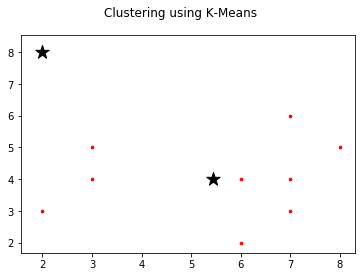

In [94]:
df = pd.read_csv('hw6data.csv')
f1 = df.iloc[:,1]
f2 = df.iloc[:,2] 
C_x= [3,2]
C_y= [4,8]
k_means(f1,f2,C_x,C_y,k=2,random = False, distance_type ='manhattan')


### Observations?
From the above experiements, one can observe that K-Means clustering greatly depends on the initial centroids. In addition, if the dataset is small like in this case, the distance measure used does not make a big difference in the clustering. This is can clearly be learned from (1) and (2).

## 2. K-Means Clustering with Real World Dataset
Using the Iris data set from:https://archive.ics.uci.edu/ml/datasets/IrisThen, implement the K-means algorithm. The Iris data set contains four-dimensional datapoints(sepal_length, 'sepal_width, petal_length, and petal_width). Therefore, in order to easily visualize sepal and petal datapoints are studied sepearately for each distance measure. For the following experiements, a random centroid initialization is used. 
The experiments consist of running K-means clustering with Euclidean, Cosine and Jarcard distance measure with K being 3 since the Iris Data has three categories(setosa,virginica,versicolor which are represented by 2,1, and 0 or red,green,blue). For each experiment, the SSEs, the accuracies with respect to the dataset categories and the number of iterations were calculated. Following the experiment, observations and analysis of the K- Means are presented.

### Sepal Width and Sepal Length from Iris Data Set Using Euclidean Distance Measure

     sepal_length  sepal_width  petal_length  petal_width  class
0             5.1          3.5           1.4          0.2      2
1             4.9          3.0           1.4          0.2      2
2             4.7          3.2           1.3          0.2      2
3             4.6          3.1           1.5          0.2      2
4             5.0          3.6           1.4          0.2      2
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      1
146           6.3          2.5           5.0          1.9      1
147           6.5          3.0           5.2          2.0      1
148           6.2          3.4           5.4          2.3      1
149           5.9          3.0           5.1          1.8      1

[150 rows x 5 columns]
The number of iterations are:14
The centroids are:[[5.773585  2.692453 ]
 [6.812766  3.0744681]
 [5.006     3.418    ]]
The SSE is :371196.75191916036
The accuracy is:82.0%


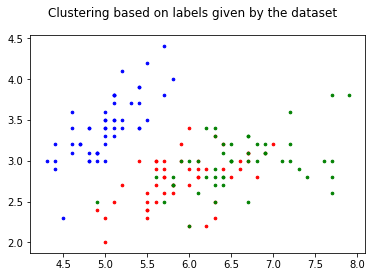

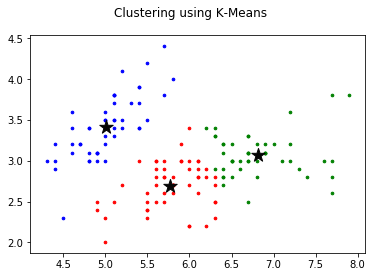

In [54]:
# loading training data
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('iris.data', header=None, names=names)
df["class"].replace({'Iris-setosa': 2}, inplace=True)
df["class"].replace({'Iris-virginica': 1}, inplace=True)
df["class"].replace({'Iris-versicolor': 0}, inplace=True)
data_labels = df["class"]
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()

# Using Sepal Length and Width as Co-ordiantes
for i in range(3): 
    index = df.index[df["class"] == i].tolist()
    f1 = df.iloc[:,0][index]
    f2 = df.iloc[:,1] [index]
    ax.scatter(f1, f2, s=7, c=colors[i])
fig.suptitle('Clustering based on labels given by the dataset', fontsize=12)
print(df)
# Using Sepal Length and Width as Co-ordiantes
f1 = df.iloc[:,0]
f2 = df.iloc[:,1] 
# The centroids below are run when random = False
C_x = [2.9183674, 2.827451, 3.418]
C_y = [4.408163, 5.384313,1.464]
#K means analysis
predicted_labels = k_means(f1,f2,C_x,C_y,k=3, random=True, distance_type ='euclidean')
acc = (np.count_nonzero(data_labels==predicted_labels)*100)/len(df)
print(f"The accuracy is:{acc}%")#np.linalg.norm(data_labels - predicted_labels, axis=1)/149)


### Petal Width and Petal Length from Iris Data Set Using Euclidean Distance Measure

     sepal_length  sepal_width  petal_length  petal_width  class
0             5.1          3.5           1.4          0.2      2
1             4.9          3.0           1.4          0.2      2
2             4.7          3.2           1.3          0.2      2
3             4.6          3.1           1.5          0.2      2
4             5.0          3.6           1.4          0.2      2
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      1
146           6.3          2.5           5.0          1.9      1
147           6.5          3.0           5.2          2.0      1
148           6.2          3.4           5.4          2.3      1
149           5.9          3.0           5.1          1.8      1

[150 rows x 5 columns]
The number of iterations are:3
The centroids are:[[4.269231  1.3423077]
 [5.5958333 2.0375   ]
 [1.464     0.244    ]]
The SSE is :419817.4315447378
The accuracy is:96.0%


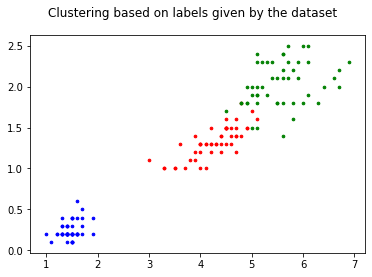

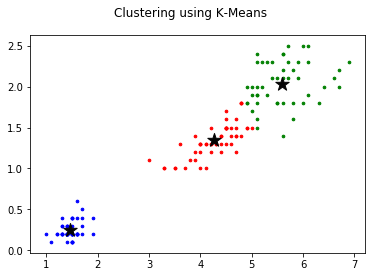

In [61]:
# loading training data
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('iris.data', header=None, names=names)
df["class"].replace({'Iris-setosa': 2}, inplace=True)
df["class"].replace({'Iris-virginica': 1}, inplace=True)
df["class"].replace({'Iris-versicolor': 0}, inplace=True)
data_labels = df["class"]
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
# Using Petal Length and Width as Co-ordiantes
for i in range(3): 
    index = df.index[df["class"] == i].tolist()
    f1 = df.iloc[:,2][index]
    f2 = df.iloc[:,3] [index]
    ax.scatter(f1, f2, s=7, c=colors[i])
fig.suptitle('Clustering based on labels given by the dataset', fontsize=12)
print(df)
# Using Petal Length and Width as Co-ordiantes
f1 = df.iloc[:,2]
f2 = df.iloc[:,3] 
# The centroids below are run when random = False
C_x = [2.9183674, 2.827451, 3.418]
C_y = [4.408163, 5.384313,1.464]
#K means analysis
predicted_labels = k_means(f1,f2,C_x,C_y,k=3, random=True, distance_type ='euclidean')
acc = (np.count_nonzero(data_labels==predicted_labels)*100)/len(df)
print(f"The accuracy is:{acc}%")#np.linalg.norm(data_labels - predicted_labels, axis=1)/149)


### Sepal Width and Sepal Length from Iris Data Set Using Cosine Distance Measure

     sepal_length  sepal_width  petal_length  petal_width  class
0             5.1          3.5           1.4          0.2      2
1             4.9          3.0           1.4          0.2      2
2             4.7          3.2           1.3          0.2      2
3             4.6          3.1           1.5          0.2      2
4             5.0          3.6           1.4          0.2      2
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      1
146           6.3          2.5           5.0          1.9      1
147           6.5          3.0           5.2          2.0      1
148           6.2          3.4           5.4          2.3      1
149           5.9          3.0           5.1          1.8      1

[150 rows x 5 columns]
The number of iterations are:5
The centroids are:[[5.9844446 2.9977777]
 [6.4535713 2.7607143]
 [5.0163264 3.4408164]]
The SSE is :378560.5500822955
The accuracy is:68.66666666666667%


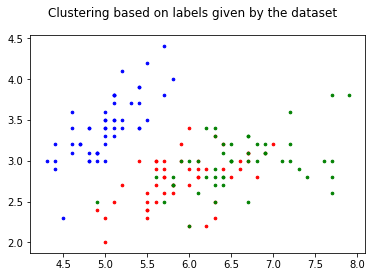

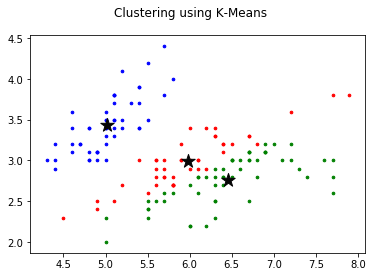

In [290]:
# loading training data
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('iris.data', header=None, names=names)
df["class"].replace({'Iris-setosa': 2}, inplace=True)
df["class"].replace({'Iris-virginica': 1}, inplace=True)
df["class"].replace({'Iris-versicolor': 0}, inplace=True)
data_labels = df["class"]
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
# Using Sepal Length and Width as Co-ordiantes
for i in range(3): 
    index = df.index[df["class"] == i].tolist()
    f1 = df.iloc[:,0][index]
    f2 = df.iloc[:,1] [index]
    ax.scatter(f1, f2, s=7, c=colors[i])
fig.suptitle('Clustering based on labels given by the dataset', fontsize=12)
print(df)
# Using Sepal Length and Width as Co-ordiantes
f1 = df.iloc[:,0]
f2 = df.iloc[:,1] 
# The centroids below are run when random = False
C_x = [2.9183674, 2.827451, 3.418]
C_y = [4.408163, 5.384313,1.464]
#K means analysis
predicted_labels = k_means(f1,f2,C_x,C_y,k=3, random=True, distance_type ='cosine')
acc = (np.count_nonzero(data_labels==predicted_labels)*100)/len(df)
print(f"The accuracy is:{acc}%")#np.linalg.norm(data_labels - predicted_labels, axis=1)/149)


### Petal Width and Petal Length from Iris Data Set Using Cosine Distance Measure

     sepal_length  sepal_width  petal_length  petal_width  class
0             5.1          3.5           1.4          0.2      2
1             4.9          3.0           1.4          0.2      2
2             4.7          3.2           1.3          0.2      2
3             4.6          3.1           1.5          0.2      2
4             5.0          3.6           1.4          0.2      2
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      1
146           6.3          2.5           5.0          1.9      1
147           6.5          3.0           5.2          2.0      1
148           6.2          3.4           5.4          2.3      1
149           5.9          3.0           5.1          1.8      1

[150 rows x 5 columns]
The number of iterations are:4
The centroids are:[[4.3188405 1.3101449]
 [5.0634146 1.9829268]
 [1.455     0.2025   ]]
The SSE is :523558.4905492144
The accuracy is:78.66666666666667%


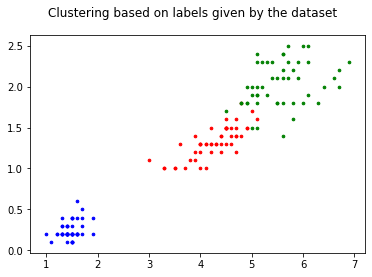

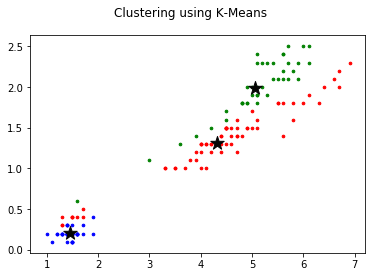

In [283]:
# loading training data
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('iris.data', header=None, names=names)
df["class"].replace({'Iris-setosa': 2}, inplace=True)
df["class"].replace({'Iris-virginica': 1}, inplace=True)
df["class"].replace({'Iris-versicolor': 0}, inplace=True)
data_labels = df["class"]
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
# Using Petal Length and Width as Co-ordiantes
for i in range(3): 
    index = df.index[df["class"] == i].tolist()
    f1 = df.iloc[:,2][index]
    f2 = df.iloc[:,3] [index]
    ax.scatter(f1, f2, s=7, c=colors[i])
fig.suptitle('Clustering based on labels given by the dataset', fontsize=12)
print(df)
# Using Petal Length and Width as Co-ordiantes
f1 = df.iloc[:,2]
f2 = df.iloc[:,3] 
# The centroids below are run when random = False
C_x = [2.9183674, 2.827451, 3.418]
C_y = [4.408163, 5.384313,1.464]
#K means analysis
predicted_labels = k_means(f1,f2,C_x,C_y,k=3, random=True, distance_type ='cosine')
acc = (np.count_nonzero(data_labels==predicted_labels)*100)/len(df)
print(f"The accuracy is:{acc}%")#np.linalg.norm(data_labels - predicted_labels, axis=1)/149)


### Sepal Width and Sepal Length from Iris Data Set Using Jaccard Distance Measure

     sepal_length  sepal_width  petal_length  petal_width  class
0             5.1          3.5           1.4          0.2      2
1             4.9          3.0           1.4          0.2      2
2             4.7          3.2           1.3          0.2      2
3             4.6          3.1           1.5          0.2      2
4             5.0          3.6           1.4          0.2      2
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      1
146           6.3          2.5           5.0          1.9      1
147           6.5          3.0           5.2          2.0      1
148           6.2          3.4           5.4          2.3      1
149           5.9          3.0           5.1          1.8      1

[150 rows x 5 columns]
The number of iterations are:3
The centroids are:[[5.9262295 2.7409837]
 [6.0767856 3.175    ]
 [5.2939396 3.4272728]]
The SSE is :443156.89235703816
The accuracy is:58.666666666666664%


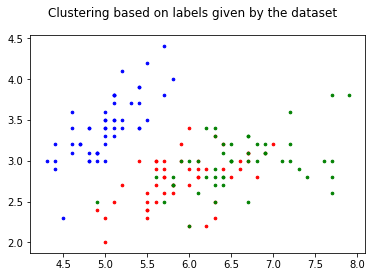

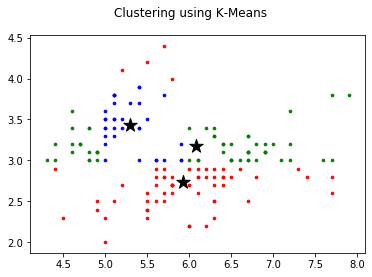

In [234]:
# loading training data
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('iris.data', header=None, names=names)
df["class"].replace({'Iris-setosa': 2}, inplace=True)
df["class"].replace({'Iris-virginica': 1}, inplace=True)
df["class"].replace({'Iris-versicolor': 0}, inplace=True)
data_labels = df["class"]
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
# Using Sepal Length and Width as Co-ordiantes
for i in range(3): 
    index = df.index[df["class"] == i].tolist()
    f1 = df.iloc[:,0][index]
    f2 = df.iloc[:,1] [index]
    ax.scatter(f1, f2, s=7, c=colors[i])
fig.suptitle('Clustering based on labels given by the dataset', fontsize=12)
print(df)
# Using Sepal Length and Width as Co-ordiantes
f1 = df.iloc[:,0]
f2 = df.iloc[:,1] 
# The centroids below are run when random = False
C_x = [2.9183674, 2.827451, 3.418]
C_y = [4.408163, 5.384313,1.464]
#K means analysis
predicted_labels = k_means(f1,f2,C_x,C_y,k=3, random=True, distance_type ='jaccard')
acc = (np.count_nonzero(data_labels==predicted_labels)*100)/len(df)
print(f"The accuracy is:{acc}%")


### Petal Width and Petal Length from Iris Data Set Using Jaccard Distance Measure

     sepal_length  sepal_width  petal_length  petal_width  class
0             5.1          3.5           1.4          0.2      2
1             4.9          3.0           1.4          0.2      2
2             4.7          3.2           1.3          0.2      2
3             4.6          3.1           1.5          0.2      2
4             5.0          3.6           1.4          0.2      2
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      1
146           6.3          2.5           5.0          1.9      1
147           6.5          3.0           5.2          2.0      1
148           6.2          3.4           5.4          2.3      1
149           5.9          3.0           5.1          1.8      1

[150 rows x 5 columns]
The number of iterations are:2
The centroids are:[[4.772826  1.6271739]
 [6.4375    2.2375   ]
 [1.464     0.244    ]]
The SSE is :536391.8432046459
The accuracy is:72.0%


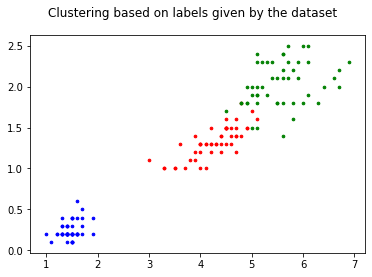

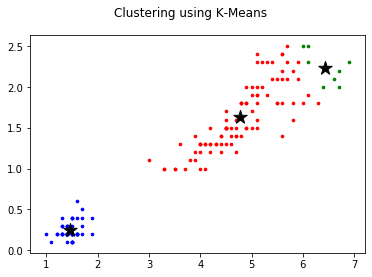

In [371]:
# loading training data
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('iris.data', header=None, names=names)
df["class"].replace({'Iris-setosa': 2}, inplace=True)
df["class"].replace({'Iris-virginica': 1}, inplace=True)
df["class"].replace({'Iris-versicolor': 0}, inplace=True)
data_labels = df["class"]
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
# Using Petal Length and Width as Co-ordiantes
for i in range(3): 
    index = df.index[df["class"] == i].tolist()
    f1 = df.iloc[:,2][index]
    f2 = df.iloc[:,3] [index]
    ax.scatter(f1, f2, s=7, c=colors[i])
fig.suptitle('Clustering based on labels given by the dataset', fontsize=12)
print(df)
# Using Petal Length and Width as Co-ordiantes
f1 = df.iloc[:,2]
f2 = df.iloc[:,3] 
# The centroids below are run when random = False
C_x = [2.9183674, 2.827451, 3.418]
C_y = [4.408163, 5.384313,1.464]
#K means analysis
predicted_labels = k_means(f1,f2,C_x,C_y,k=3, random= True, distance_type ='jaccard')
acc = (np.count_nonzero(data_labels==predicted_labels)*100)/len(df)
print(f"The accuracy is:{acc}%")#np.linalg.norm(data_labels - predicted_labels, axis=1)/149)


### Observations 

#### Sepal
    Euclidean: SSE = 371,196 Accuracy = 82%    Iterations = 14

    Cosine:    SSE = 378,560 Accuracy = 68.7% Iterations = 5

    Jaccard:   SSE = 443,156 Accuracy = 58.7%  Iterations = 3


#### Petal
    Euclidean: SSE = 419,817   Accuracy = 96%   Iterations = 3

    Cosine:    SSE = 523,558  Accuracy = 78.7% Iterations = 6

    Jaccard:   SSE = 536,391  Accuracy = 72% Iterations = 2

### Analysis

    Q1: Compare the SSEs of Euclidean-K-means Cosine-K-means, Jarcard-K-means. Which method is better and why?

K-Means clustering algorithms aim at minimizing SSEs. As such, from the above observations, for Sepal and Petal data pairs, the Euclidean K-means has the least value of SSE when compared to the rest of the distance measures. This is because the Euclidean distance mesure fits our datasets. One can argue that distance measures on their own have little or no effect. Depending upon the dataset's dimensions and shape, a particular distance measure can have an advantage. In this case,the 2D pairing varies more on magnitude than it does on orientation. Therefore, Euclidean K-Means performs with less SSE for both petal and sepal pairings. 

    Q2: Compare the accuracies of Euclidean-K-means Cosine-K-means, Jarcard-K-means. Which metric is better and    why?
The Euclidean K-Means has the best accuracy for both petal and sepal pairings. The reason is similar to what is discussed in Q1. The Euclidean K-Means fits the nature of the data.  

    Q3: Which of Euclidean-K-means, Cosine-K-means, Jarcard-K-means requires more iterations and times and why?
    
Iterations are correlated with the termination decision used. The K-Means repeatedly constructs new clusters until the centroids of the previous and current clusters are the same. Cluster reconstruction directly involves distance measures from data points to the centroid. With this in mind, one can justify why Jaccard K-Means has the least iterations. Jaccard distance measure looks for the intersection of instances or pairs. This intersection shows little variation for 2D data sets as such the error or change in centroids converges quickly. In other words, Jaccard K-Means, generally speaking, requires the least iterations. 

    Q4: Compare the SSEs of Euclidean-K-means Cosine-K-means, Jaccard-K-means with respect to the following three terminating conditions: 
    • when there is no change in centroid position [Shown above]
    • when the SSE value increases in the next iteration
    • when the maximum preset value (100) of iteration is complete 

#### When the maximum preset value (100) of iteration is complete for Euclidean

     sepal_length  sepal_width  petal_length  petal_width  class
0             5.1          3.5           1.4          0.2      2
1             4.9          3.0           1.4          0.2      2
2             4.7          3.2           1.3          0.2      2
3             4.6          3.1           1.5          0.2      2
4             5.0          3.6           1.4          0.2      2
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      1
146           6.3          2.5           5.0          1.9      1
147           6.5          3.0           5.2          2.0      1
148           6.2          3.4           5.4          2.3      1
149           5.9          3.0           5.1          1.8      1

[150 rows x 5 columns]
The number of iterations are:100
The centroids are:[[4.171875   1.246875  ]
 [5.3461537  1.916923  ]
 [1.5622642  0.28867924]]
The SSE is :258318.0995742762
The accuracy is:88.0%


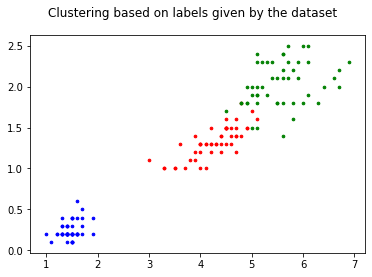

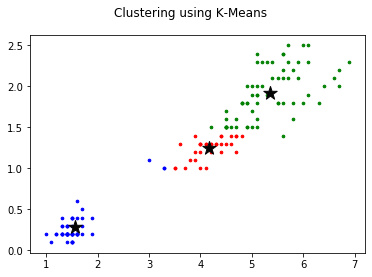

In [439]:
# loading training data
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('iris.data', header=None, names=names)
df["class"].replace({'Iris-setosa': 2}, inplace=True)
df["class"].replace({'Iris-virginica': 1}, inplace=True)
df["class"].replace({'Iris-versicolor': 0}, inplace=True)
data_labels = df["class"]
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
# Using Petal Length and Width as Co-ordiantes
for i in range(3): 
    index = df.index[df["class"] == i].tolist()
    f1 = df.iloc[:,2][index]
    f2 = df.iloc[:,3] [index]
    ax.scatter(f1, f2, s=7, c=colors[i])
fig.suptitle('Clustering based on labels given by the dataset', fontsize=12)
print(df)
# Using Petal Length and Width as Co-ordiantes
f1 = df.iloc[:,2]
f2 = df.iloc[:,3] 
# The centroids below are run when random = False
C_x = [2.9183674, 2.827451, 3.418]
C_y = [4.408163, 5.384313,1.464]
#K means analysis
predicted_labels = k_means(f1,f2,C_x,C_y,k=3, random= True, distance_type ='euclidean')
acc = (np.count_nonzero(data_labels==predicted_labels)*100)/len(df)
print(f"The accuracy is:{acc}%")#np.linalg.norm(data_labels - predicted_labels, axis=1)/149)


#### When the maximum preset value (100) of iteration is complete for Cosine

     sepal_length  sepal_width  petal_length  petal_width  class
0             5.1          3.5           1.4          0.2      2
1             4.9          3.0           1.4          0.2      2
2             4.7          3.2           1.3          0.2      2
3             4.6          3.1           1.5          0.2      2
4             5.0          3.6           1.4          0.2      2
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      1
146           6.3          2.5           5.0          1.9      1
147           6.5          3.0           5.2          2.0      1
148           6.2          3.4           5.4          2.3      1
149           5.9          3.0           5.1          1.8      1

[150 rows x 5 columns]
The number of iterations are:100
The centroids are:[[5.4384613  2.323077  ]
 [4.755844   1.5987014 ]
 [2.115      0.44166666]]
The SSE is :395396.93933135655
The accuracy is:54.0%


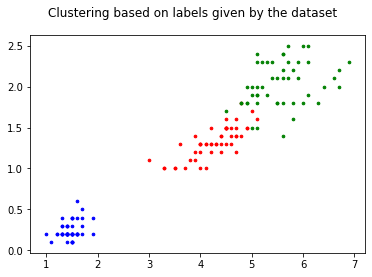

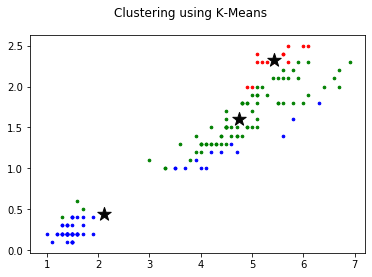

In [455]:
# loading training data
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('iris.data', header=None, names=names)
df["class"].replace({'Iris-setosa': 2}, inplace=True)
df["class"].replace({'Iris-virginica': 1}, inplace=True)
df["class"].replace({'Iris-versicolor': 0}, inplace=True)
data_labels = df["class"]
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
# Using Petal Length and Width as Co-ordiantes
for i in range(3): 
    index = df.index[df["class"] == i].tolist()
    f1 = df.iloc[:,2][index]
    f2 = df.iloc[:,3] [index]
    ax.scatter(f1, f2, s=7, c=colors[i])
fig.suptitle('Clustering based on labels given by the dataset', fontsize=12)
print(df)
# Using Petal Length and Width as Co-ordiantes
f1 = df.iloc[:,2]
f2 = df.iloc[:,3] 
# The centroids below are run when random = False
C_x = [2.9183674, 2.827451, 3.418]
C_y = [4.408163, 5.384313,1.464]
#K means analysis
predicted_labels = k_means(f1,f2,C_x,C_y,k=3, random= True, distance_type ='cosine')
acc = (np.count_nonzero(data_labels==predicted_labels)*100)/len(df)
print(f"The accuracy is:{acc}%")#np.linalg.norm(data_labels - predicted_labels, axis=1)/149)


#### When the maximum preset value (100) of iteration is complete for Jaccard

     sepal_length  sepal_width  petal_length  petal_width  class
0             5.1          3.5           1.4          0.2      2
1             4.9          3.0           1.4          0.2      2
2             4.7          3.2           1.3          0.2      2
3             4.6          3.1           1.5          0.2      2
4             5.0          3.6           1.4          0.2      2
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      1
146           6.3          2.5           5.0          1.9      1
147           6.5          3.0           5.2          2.0      1
148           6.2          3.4           5.4          2.3      1
149           5.9          3.0           5.1          1.8      1

[150 rows x 5 columns]
The number of iterations are:100
The centroids are:[[3.0214953  0.85607475]
 [5.4        2.0085714 ]
 [6.4375     2.2375    ]]
The SSE is :782239.3026881132
The accuracy is:54.0%


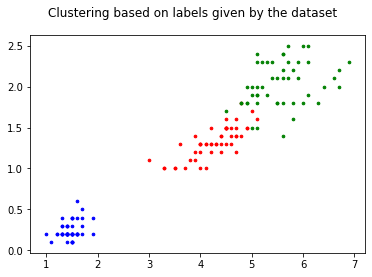

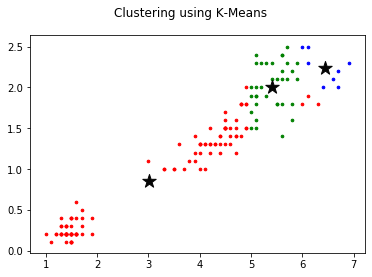

In [459]:
# loading training data
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('iris.data', header=None, names=names)
df["class"].replace({'Iris-setosa': 2}, inplace=True)
df["class"].replace({'Iris-virginica': 1}, inplace=True)
df["class"].replace({'Iris-versicolor': 0}, inplace=True)
data_labels = df["class"]
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
# Using Petal Length and Width as Co-ordiantes
for i in range(3): 
    index = df.index[df["class"] == i].tolist()
    f1 = df.iloc[:,2][index]
    f2 = df.iloc[:,3] [index]
    ax.scatter(f1, f2, s=7, c=colors[i])
fig.suptitle('Clustering based on labels given by the dataset', fontsize=12)
print(df)
# Using Petal Length and Width as Co-ordiantes
f1 = df.iloc[:,2]
f2 = df.iloc[:,3] 
# The centroids below are run when random = False
C_x = [2.9183674, 2.827451, 3.418]
C_y = [4.408163, 5.384313,1.464]
#K means analysis
predicted_labels = k_means(f1,f2,C_x,C_y,k=3, random= True, distance_type ='jaccard')
acc = (np.count_nonzero(data_labels==predicted_labels)*100)/len(df)
print(f"The accuracy is:{acc}%")#np.linalg.norm(data_labels - predicted_labels, axis=1)/149)


#### When the SSE value increases in the next iteration for Euclidean

     sepal_length  sepal_width  petal_length  petal_width  class
0             5.1          3.5           1.4          0.2      2
1             4.9          3.0           1.4          0.2      2
2             4.7          3.2           1.3          0.2      2
3             4.6          3.1           1.5          0.2      2
4             5.0          3.6           1.4          0.2      2
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      1
146           6.3          2.5           5.0          1.9      1
147           6.5          3.0           5.2          2.0      1
148           6.2          3.4           5.4          2.3      1
149           5.9          3.0           5.1          1.8      1

[150 rows x 5 columns]
The number of iterations are:1
The centroids are:[[4.958763  1.6958762]
 [3.2       1.0333333]
 [1.464     0.244    ]]
The SSE is :616562.1947639565
The accuracy is:64.66666666666667%


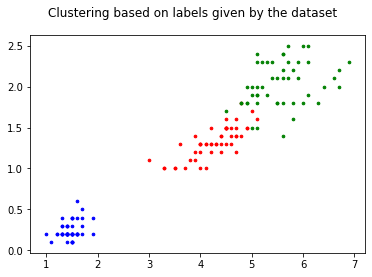

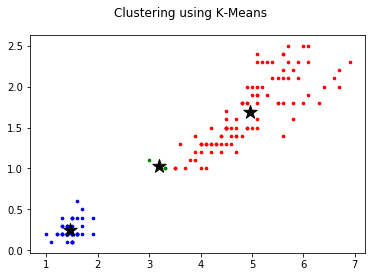

In [430]:
# loading training data
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('iris.data', header=None, names=names)
df["class"].replace({'Iris-setosa': 2}, inplace=True)
df["class"].replace({'Iris-virginica': 1}, inplace=True)
df["class"].replace({'Iris-versicolor': 0}, inplace=True)
data_labels = df["class"]
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
# Using Petal Length and Width as Co-ordiantes
for i in range(3): 
    index = df.index[df["class"] == i].tolist()
    f1 = df.iloc[:,2][index]
    f2 = df.iloc[:,3] [index]
    ax.scatter(f1, f2, s=7, c=colors[i])
fig.suptitle('Clustering based on labels given by the dataset', fontsize=12)
print(df)
# Using Petal Length and Width as Co-ordiantes
f1 = df.iloc[:,2]
f2 = df.iloc[:,3] 
# The centroids below are run when random = False
C_x = [2.9183674, 2.827451, 3.418]
C_y = [4.408163, 5.384313,1.464]
#K means analysis
predicted_labels = k_means(f1,f2,C_x,C_y,k=3, random= True, distance_type ='euclidean')
acc = (np.count_nonzero(data_labels==predicted_labels)*100)/len(df)
print(f"The accuracy is:{acc}%")#np.linalg.norm(data_labels - predicted_labels, axis=1)/149)


#### When the SSE value increases in the next iteration for Cosine

     sepal_length  sepal_width  petal_length  petal_width  class
0             5.1          3.5           1.4          0.2      2
1             4.9          3.0           1.4          0.2      2
2             4.7          3.2           1.3          0.2      2
3             4.6          3.1           1.5          0.2      2
4             5.0          3.6           1.4          0.2      2
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      1
146           6.3          2.5           5.0          1.9      1
147           6.5          3.0           5.2          2.0      1
148           6.2          3.4           5.4          2.3      1
149           5.9          3.0           5.1          1.8      1

[150 rows x 5 columns]
The number of iterations are:1
The centroids are:[[5.28      2.36     ]
 [3.1396039 0.8455446]
 [5.0068183 1.8772727]]
The SSE is :680693.6010324986
The accuracy is:10.666666666666666%


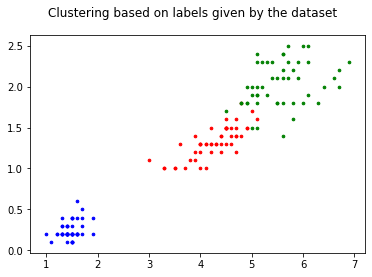

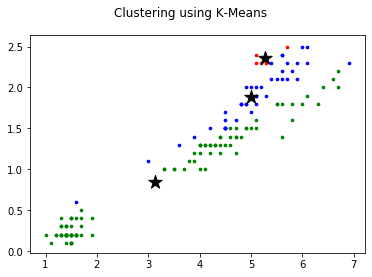

In [431]:
# loading training data
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('iris.data', header=None, names=names)
df["class"].replace({'Iris-setosa': 2}, inplace=True)
df["class"].replace({'Iris-virginica': 1}, inplace=True)
df["class"].replace({'Iris-versicolor': 0}, inplace=True)
data_labels = df["class"]
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
# Using Petal Length and Width as Co-ordiantes
for i in range(3): 
    index = df.index[df["class"] == i].tolist()
    f1 = df.iloc[:,2][index]
    f2 = df.iloc[:,3] [index]
    ax.scatter(f1, f2, s=7, c=colors[i])
fig.suptitle('Clustering based on labels given by the dataset', fontsize=12)
print(df)
# Using Petal Length and Width as Co-ordiantes
f1 = df.iloc[:,2]
f2 = df.iloc[:,3] 
# The centroids below are run when random = False
C_x = [2.9183674, 2.827451, 3.418]
C_y = [4.408163, 5.384313,1.464]
#K means analysis
predicted_labels = k_means(f1,f2,C_x,C_y,k=3, random= True, distance_type ='cosine')
acc = (np.count_nonzero(data_labels==predicted_labels)*100)/len(df)
print(f"The accuracy is:{acc}%")#np.linalg.norm(data_labels - predicted_labels, axis=1)/149)


#### When the SSE value increases in the next iteration for Jaccard

     sepal_length  sepal_width  petal_length  petal_width  class
0             5.1          3.5           1.4          0.2      2
1             4.9          3.0           1.4          0.2      2
2             4.7          3.2           1.3          0.2      2
3             4.6          3.1           1.5          0.2      2
4             5.0          3.6           1.4          0.2      2
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      1
146           6.3          2.5           5.0          1.9      1
147           6.5          3.0           5.2          2.0      1
148           6.2          3.4           5.4          2.3      1
149           5.9          3.0           5.1          1.8      1

[150 rows x 5 columns]
The number of iterations are:1
The centroids are:[[3.5434783 1.1188406]
 [6.3545456 2.1272728]
 [4.9       2.       ]]
The SSE is :1647168.6720254344
The accuracy is:40.666666666666664%


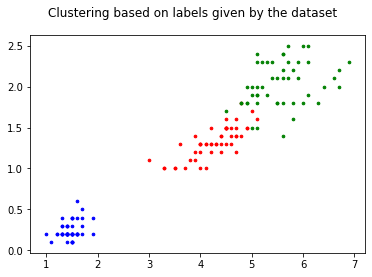

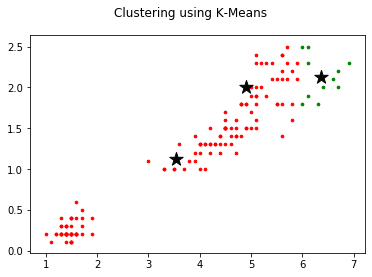

In [423]:
# loading training data
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('iris.data', header=None, names=names)
df["class"].replace({'Iris-setosa': 2}, inplace=True)
df["class"].replace({'Iris-virginica': 1}, inplace=True)
df["class"].replace({'Iris-versicolor': 0}, inplace=True)
data_labels = df["class"]
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
# Using Petal Length and Width as Co-ordiantes
for i in range(3): 
    index = df.index[df["class"] == i].tolist()
    f1 = df.iloc[:,2][index]
    f2 = df.iloc[:,3] [index]
    ax.scatter(f1, f2, s=7, c=colors[i])
fig.suptitle('Clustering based on labels given by the dataset', fontsize=12)
print(df)
# Using Petal Length and Width as Co-ordiantes
f1 = df.iloc[:,2]
f2 = df.iloc[:,3] 
# The centroids below are run when random = False
C_x = [2.9183674, 2.827451, 3.418]
C_y = [4.408163, 5.384313,1.464]
#K means analysis
predicted_labels = k_means(f1,f2,C_x,C_y,k=3, random= True, distance_type ='jaccard')
acc = (np.count_nonzero(data_labels==predicted_labels)*100)/len(df)
print(f"The accuracy is:{acc}%")#np.linalg.norm(data_labels - predicted_labels, axis=1)/149)


#### Compare the SSE for each method of termination across the three distance measures?
Euclidean K-Means for each method generates the least SSE whhereas Jaccard K-Means results in the most SSE. 
#### Which method requires more time or more iterations and why?
Euclidean K-Means since it converges slower than the rest methods. 

#### Limitations of the analysis
The analysis totatlly disregrads the random centroid initialization and how it affects it. However, the above analysis was a good excercise to see the correlation among the nature of the data, the distance mesure as well as performance in terms of SSE, accuracy, and number of iterations. 


## 3. Understanding K-Means:
### • List the general idea of K-means clustering algorithm? 
The K- means is a center based clustering algorithm. It groups a number of data points into k clusters by 
minimizing the sum of squared distances between every point and its nearest cluster mean (centroid).The 
general idea of K-means includes three major steps:
Step 1 - Pick K random points as cluster centers called centroids.
Step 2 - Assign each data point X to nearest cluster by calculating its distance to each centroid.
Step 3 - Find new cluster center by taking the average of the assigned points.
Step 4 - Repeat until the new cluster center is no different from the previous cluster center.
### • Please give a scenario in which K-means cluster may not work very well? 
K-Means clustering algorithm fails when the data contains noise & outliers, unevenly sized and nonunifrom 
density clusters, and non-overlapping clusters. K-means' performance depends also on the 
distance measure used. Some distance measures might not fit the datasets of interest. As such, a thorough   
understadning of the nature of the dataset is vital for ensuring K-means doesn't fail.
### • What is the advantage of K-Means? What are the disadvantages of K-Means?
Advantages include that it:
- Can be implemented easily( well after painful debugging of course :D).
- Scales to large data sets and easily adapts to new examples.
- Convergences for all datasets.
- Gives the freedom to choose positions of centroids.
- Generalizes to clusters of different shapes and sizes, such as elliptical clusters.

Disadvantages include that it:
- Dependens on initial centroid values and manual settings of K clusters
- Can't detect nosie and outliers and remove them. 
- Has trouble clustering data of varying sizes and density.

### • The classic K-means algorithm randomly initializes K centers. Is there any better strategy for selecting K  initial centers?
Any clustering algorithm could be used as a replacement for the random initialization technique for k-means. 
It is imperative, however, that such algorithms require additional parameters except for k and that they are 
are easy to implement. The most common heuristics used to replace random centroids include use of random 
partitions where every point is randomly assigned into a number of clusters and their centroids are then    
calculated. Other heuristics include, sorting-based, density-based, projection-based, and furtherst-point    
based ways of finding centroids. 
More is presented in the attached paper.https://www.sciencedirect.com/science/article/pii/S0031320319301608